<a href="https://colab.research.google.com/github/macbhaldar/Predicting-Electricity-Demand/blob/main/Predicting_Electricity_Demand_4_Support_Vector_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Load Feature-Engineered Dataset

In [2]:
df = pd.read_csv("electricity_demand_features.csv")
df.head()

,day,hour,time_normalized,sin_time,cos_time,temp,is_weekend,measured_demand
0,0,0.0,0.000000,0.000000,1.000000,25.745071,0,2.904928
1,0,0.5,0.020833,0.130526,0.991445,25.836813,0,3.321722
2,0,1.0,0.041667,0.258819,0.965926,28.042085,0,3.488050
3,0,1.5,0.062500,0.382683,0.923880,30.346012,0,3.534498
4,0,2.0,0.083333,0.500000,0.866025,28.648770,0,4.059016


### Define Features and Target

In [3]:
X = df[
    ["time_normalized", "sin_time", "cos_time", "temp", "is_weekend"]
].values

y = df["measured_demand"].values

### Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

### Feature Scaling

In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Baseline SVR (RBF Kernel)

In [6]:
svr = SVR(
    kernel="rbf",
    C=10,
    gamma="scale",
    epsilon=0.1
)

svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mse_svr, r2_svr

(0.04269328358964963, 0.962912426274377)

### Visualize Predictions

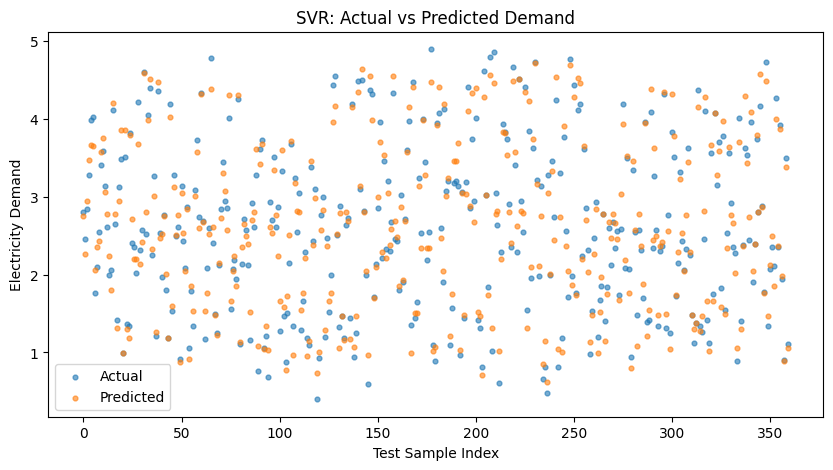

In [7]:
plt.figure(figsize=(10, 5))

plt.scatter(
    range(len(y_test)),
    y_test,
    s=12,
    alpha=0.6,
    label="Actual"
)

plt.scatter(
    range(len(y_pred_svr)),
    y_pred_svr,
    s=12,
    alpha=0.6,
    label="Predicted"
)

plt.xlabel("Test Sample Index")
plt.ylabel("Electricity Demand")
plt.title("SVR: Actual vs Predicted Demand")
plt.legend()
plt.show()

### Residual Analysis

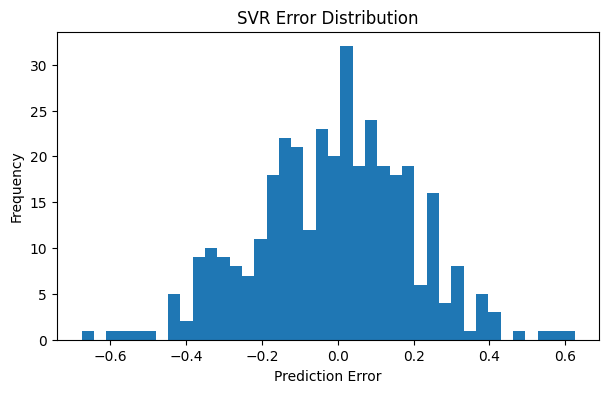

In [8]:
errors = y_test - y_pred_svr

plt.figure(figsize=(7, 4))
plt.hist(errors, bins=40)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("SVR Error Distribution")
plt.show()

### Hyperparameter Tuning with Grid Search

In [9]:
param_grid = {
    "C": [1, 10, 50, 100],
    "gamma": [0.1, 0.5, 1, "scale"],
    "epsilon": [0.05, 0.1, 0.2]
}

svr_grid = GridSearchCV(
    SVR(kernel="rbf"),
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

svr_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100], 'epsilon': [0.05, 0.1, 0.2],
                         'gamma': [0.1, 0.5, 1, 'scale']},
             scoring='neg_mean_squared_error')

### Best Model Evaluation

In [10]:
best_svr = svr_grid.best_estimator_

y_pred_best = best_svr.predict(X_test_scaled)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

svr_grid.best_params_, mse_best, r2_best

({'C': 10, 'epsilon': 0.05, 'gamma': 0.1},
 0.04194536261304623,
 0.9635621437949906)

### Compare with Baseline

In [11]:
print("Model Comparison")
print("-" * 40)
print(f"SVR (default) MSE : {mse_svr:.4f}")
print(f"SVR (tuned)   MSE : {mse_best:.4f}")
print(f"SVR (tuned)   R²  : {r2_best:.4f}")

Model Comparison
----------------------------------------
SVR (default) MSE : 0.0427
SVR (tuned)   MSE : 0.0419
SVR (tuned)   R²  : 0.9636


### Learning Curve

In [12]:
C_values = [0.1, 1, 10, 50, 100]
mse_list = []

for C in C_values:
    svr = SVR(kernel="rbf", C=C, gamma="scale")
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)
    mse_list.append(mean_squared_error(y_test, y_pred))

### Plot Complexity vs Error

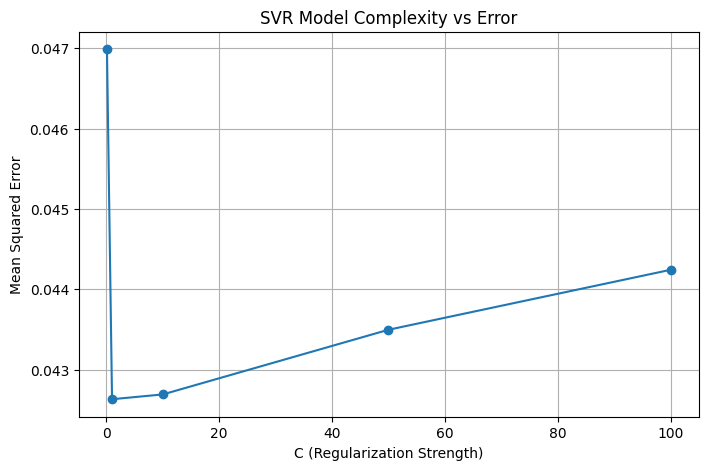

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(C_values, mse_list, marker="o")

plt.xlabel("C (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("SVR Model Complexity vs Error")
plt.grid(True)
plt.show()

### Summary

- SVR captures non-linear demand patterns effectively
- RBF kernel models smooth daily cycles
- Hyperparameter tuning significantly improves performance
- SVR performs competitively with RFF + Linear Regression
- Computational cost increases with dataset size

SVR serves as a strong non-linear benchmark before:
- Gaussian Process Regression
- Neural Networks
- LSTM time-series models